In [23]:
import yfinance as yf
import pandas as pd
import os

In [19]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [65]:
#Define the ticker symbol and period for which we want to fetch stock price
ticker="AAPL"
start_date = "2023-04-01"
end_date = "2024-08-17"

#fetch the stock prices for the specified period
data = yf.download(ticker,start=start_date,end=end_date)

# Print the fetched stock prices
print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-03  164.270004  166.289993  164.220001  166.169998  164.873032   
2023-04-04  166.600006  166.839996  165.110001  165.630005  164.337234   
2023-04-05  164.740005  165.050003  161.800003  163.759995  162.481827   
2023-04-06  162.429993  164.960007  162.000000  164.660004  163.374817   
2023-04-10  161.419998  162.029999  160.080002  162.029999  160.765335   
...                ...         ...         ...         ...         ...   
2024-08-09  212.100006  216.779999  211.970001  216.240005  215.990005   
2024-08-12  216.070007  219.509995  215.600006  217.529999  217.529999   
2024-08-13  219.009995  221.889999  219.009995  221.270004  221.270004   
2024-08-14  220.570007  223.029999  219.699997  221.720001  221.720001   
2024-08-15  224.550003  225.229996  222.759995  225.009995  225.009995   

              Volume  
Date          

In [67]:
df=pd.DataFrame(data)

In [69]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,164.270004,166.289993,164.220001,166.169998,164.873032,56976200
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.337234,46278300
2023-04-05,164.740005,165.050003,161.800003,163.759995,162.481827,51511700
2023-04-06,162.429993,164.960007,162.000000,164.660004,163.374817,45390100
2023-04-10,161.419998,162.029999,160.080002,162.029999,160.765335,47716900


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345 entries, 2023-04-03 to 2024-08-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       345 non-null    float64
 1   High       345 non-null    float64
 2   Low        345 non-null    float64
 3   Close      345 non-null    float64
 4   Adj Close  345 non-null    float64
 5   Volume     345 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 18.9 KB


In [73]:
df['data']=pd.to_datetime(df.index)

In [75]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,data
Date,,,,,,,
2023-04-03,164.270004,166.289993,164.220001,166.169998,164.873032,56976200,2023-04-03
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.337234,46278300,2023-04-04
2023-04-05,164.740005,165.050003,161.800003,163.759995,162.481827,51511700,2023-04-05
2023-04-06,162.429993,164.960007,162.000000,164.660004,163.374817,45390100,2023-04-06
2023-04-10,161.419998,162.029999,160.080002,162.029999,160.765335,47716900,2023-04-10


In [77]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'data'], dtype='object')


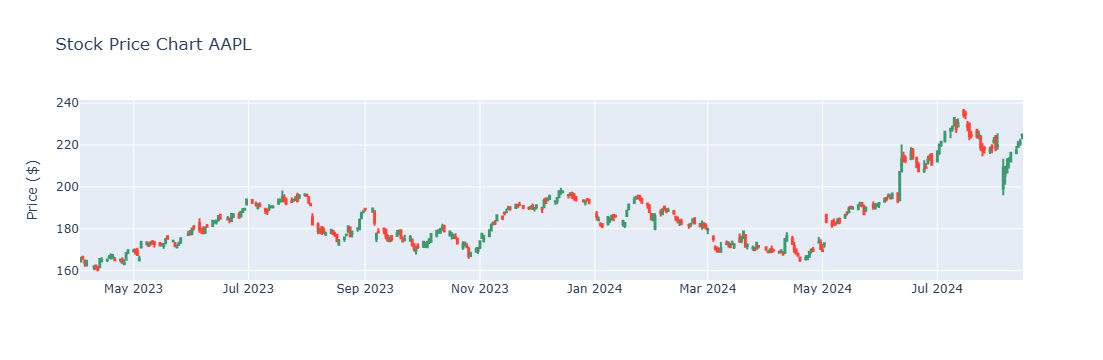

In [81]:
import plotly.graph_objects as go

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['data'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

# Customize the chart layout
fig.update_layout(
    title='Stock Price Chart AAPL',
    yaxis_title='Price ($)',
    xaxis_rangeslider_visible=False
)

# Display the chart
fig.show()


In [87]:
df.drop(['data','Volume'],axis=1,inplace=True)

In [89]:
df.reset_index(drop=True,inplace=True)

<Axes: >

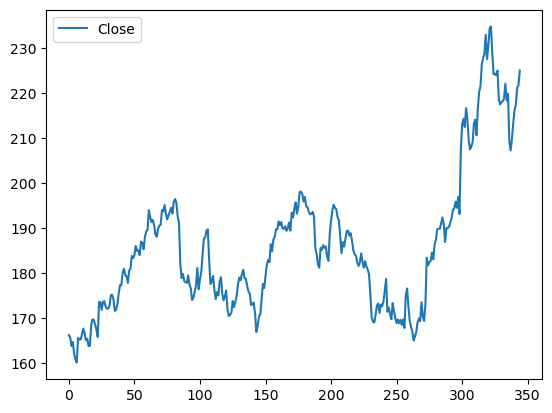

In [91]:
df.plot.line(y="Close",use_index=True)

In [93]:
df.reset_index(drop=True,inplace=True)

In [105]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
# df = pd.read_csv('stock_prices.csv')

# Split the dataset into training and testing dataset
X= df[['Open','Close','High','Low','Adj Close']] # Input Features
y= df['Close'] # Target value
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Build the Random forest Regression model
rf = RandomForestRegressor(n_estimators=100,random_state=42)

# Train the model
rf.fit(X_train,y_train)

# Make prediction on testing set
y_pred = rf.predict(X_test)

# Evaluate the model using mean squared error
mse= mean_squared_error(y_test,y_pred)
print('Mean Squared Error',mse)

Mean Squared Error 0.12776842098301355


In [113]:
import numpy as np

# Input values to predict the stock price
new_data=np.array([[224.550003,225.229996,222.759995,225.009995,225.009995]])

# Make predictions using the trained model
predicted_price=rf.predict(new_data)

# Print the predicted stock price
print('Predicted Stock Price :',predicted_price[0])

Predicted Stock Price : 224.64679656982423


C:\Users\DELL\anaconda3\conda\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [115]:
df.tail()

,Open,High,Low,Close,Adj Close
340,212.100006,216.779999,211.970001,216.240005,215.990005
341,216.070007,219.509995,215.600006,217.529999,217.529999
342,219.009995,221.889999,219.009995,221.270004,221.270004
343,220.570007,223.029999,219.699997,221.720001,221.720001
344,224.550003,225.229996,222.759995,225.009995,225.009995
